In [14]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import bls

# Data from U.S. BUREAU OF LABOR STATISTICS and from FRED ECONOMIC DATA

In [15]:
# Wages and salaries for Private industry workers in All industries and occupations, 12-month percent change

wg = bls.get_series('CIU2020000000000A')
wg.to_csv('wages_data.csv')
wages = pd.read_csv('wages_data.csv')
wages.columns = 'Date','Wages'
wages

No Data Available for Series CIU2020000000000A Year: 2022


,Date,Wages
0,2013Q1,1.7
1,2013Q2,1.9
2,2013Q3,1.8
3,2013Q4,2.1
4,2014Q1,1.7
5,2014Q2,1.9
6,2014Q3,2.3
7,2014Q4,2.2
8,2015Q1,2.8
9,2015Q2,2.2


In [16]:
# CPI data

cpi = bls.get_series('CUUR0000SA0')
cpi.to_csv('cpi_data.csv')
cpi_data = pd.read_csv('cpi_data.csv')
cpi_data.columns = 'Date','CPI'
cpi_data

,Date,CPI
0,2013-01,230.280
1,2013-02,232.166
2,2013-03,232.773
3,2013-04,232.531
4,2013-05,232.945
...,...,...
105,2021-10,276.589
106,2021-11,277.948
107,2021-12,278.802
108,2022-01,281.148


In [17]:
#Identifying data for quarterly records

cpi_data['Date'] = cpi_data['Date'].str.replace('-03', 'Q1')
cpi_data['Date'] = cpi_data['Date'].str.replace('-06', 'Q2')
cpi_data['Date'] = cpi_data['Date'].str.replace('-09', 'Q3')
cpi_data['Date'] = cpi_data['Date'].str.replace('-12', 'Q4')
cpi_data

,Date,CPI
0,2013-01,230.280
1,2013-02,232.166
2,2013Q1,232.773
3,2013-04,232.531
4,2013-05,232.945
...,...,...
105,2021-10,276.589
106,2021-11,277.948
107,2021Q4,278.802
108,2022-01,281.148


In [18]:
# Filtering data for quarterly records

cpi_data_byQ = cpi_data[cpi_data.Date.str.contains('Q')]
cpi_data_byQ

,Date,CPI
2,2013Q1,232.773
5,2013Q2,233.504
8,2013Q3,234.149
11,2013Q4,233.049
14,2014Q1,236.293
17,2014Q2,238.343
20,2014Q3,238.031
23,2014Q4,234.812
26,2015Q1,236.119
29,2015Q2,238.638


In [19]:
# Adjusting wages %

refnum = 232.773
def process_wages(x):
    global refnum
    if type(x) is str:
        return x
    elif x:
        refnum = (x / 400) * refnum + refnum
        return refnum
    else:
        return
newwages = wages.applymap(process_wages)
newwages

,Date,Wages
0,2013Q1,233.762285
1,2013Q2,234.872656
2,2013Q3,235.929583
3,2013Q4,237.168213
4,2014Q1,238.176178
5,2014Q2,239.307515
6,2014Q3,240.683533
7,2014Q4,242.007293
8,2015Q1,243.701344
9,2015Q2,245.041701


In [20]:
merged_data = pd.merge(cpi_data_byQ,newwages, on='Date')
merged_data

,Date,CPI,Wages
0,2013Q1,232.773,233.762285
1,2013Q2,233.504,234.872656
2,2013Q3,234.149,235.929583
3,2013Q4,233.049,237.168213
4,2014Q1,236.293,238.176178
5,2014Q2,238.343,239.307515
6,2014Q3,238.031,240.683533
7,2014Q4,234.812,242.007293
8,2015Q1,236.119,243.701344
9,2015Q2,238.638,245.041701


Text(0.5, 1.0, 'Waves Vs CPI')

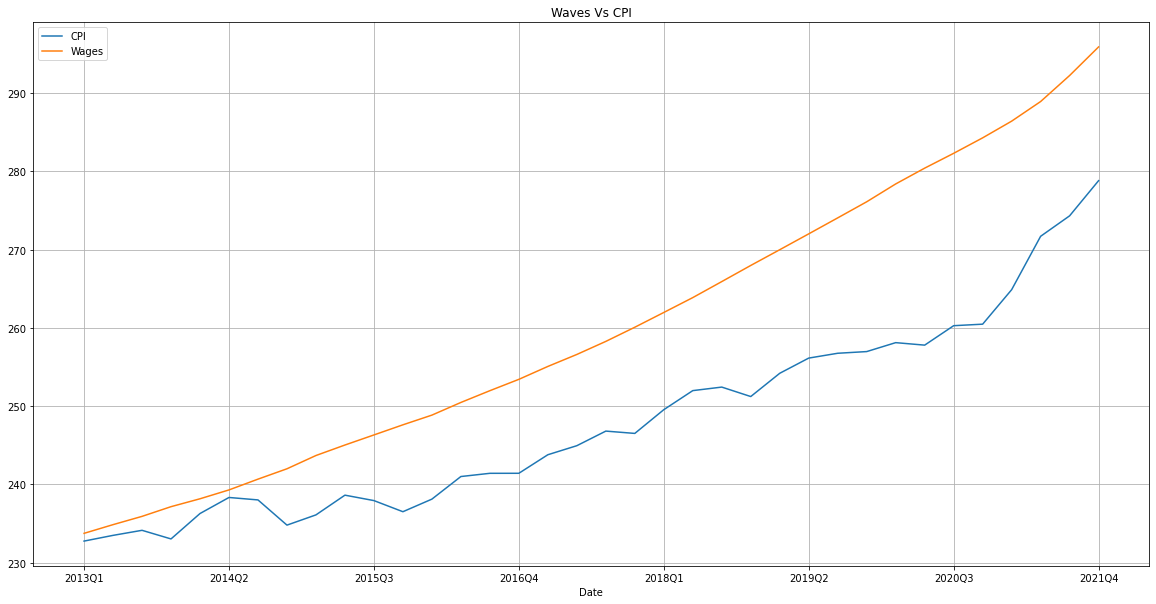

In [68]:
merged_data.plot(x="Date", y=["CPI", "Wages"],kind='line', figsize=(20, 10)).grid()
plt.title("Waves Vs CPI")


Text(0.5, 0, 'Dates')

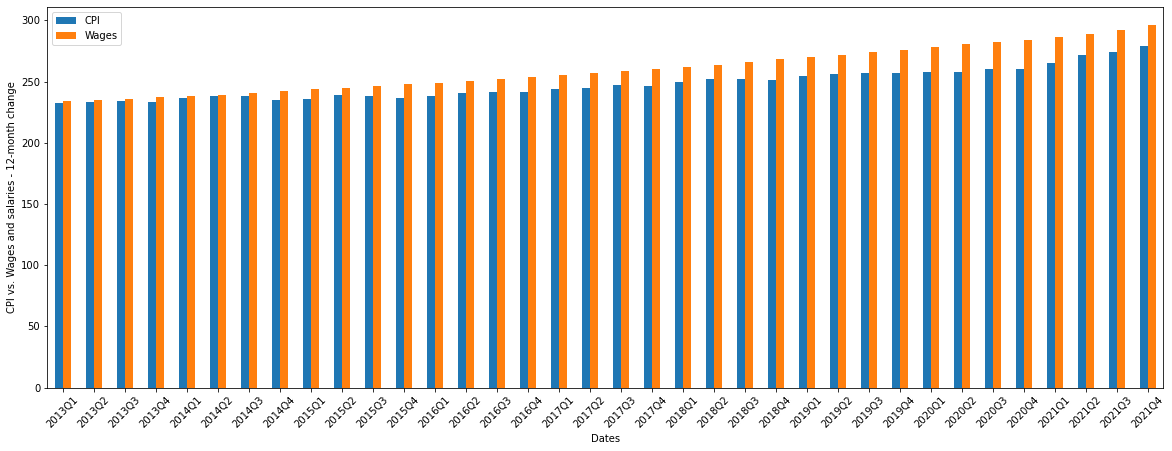

In [22]:
ax = merged_data.plot(kind='bar', figsize=(20, 7))
ax.set_xticklabels(merged_data.Date, rotation=45)
ax.set_ylabel('CPI vs. Wages and salaries - 12-month change')
ax.set_xlabel('Dates')

In [23]:
#Federal Debt: Total Public Debt as Percent of Gross Domestic Product, Percent of GDP, Quarterly, Seasonally Adjusted VS Velocity of M2 Money Stock, Ratio, Quarterly, Seasonally Adjusted

gdp_m2 = pd.read_csv('debt_GPD_vs_Velocity_M2.csv', delimiter=',')
pd.to_datetime(gdp_m2['DATE']).head()
gdp_m2['DATE'] = pd.to_datetime(gdp_m2['DATE'])
gdp_m2 = gdp_m2.rename(columns={'GFDEGDQ188S': 'DEBTGDP'})
gdp_m2.loc[0:27,['DEBTGDP']] = [0]
gdp_m2['DEBTGDP'] = gdp_m2['DEBTGDP'].astype(float)
gdp_m2

,DATE,DEBTGDP,M2V
0,1959-01-01,0.00000,1.773
1,1959-04-01,0.00000,1.789
2,1959-07-01,0.00000,1.773
3,1959-10-01,0.00000,1.779
4,1960-01-01,0.00000,1.817
...,...,...,...
247,2020-10-01,129.19415,1.134
248,2021-01-01,127.65351,1.122
249,2021-04-01,125.45397,1.118
250,2021-07-01,122.52606,1.115


In [24]:
gdp_m2.dtypes

DATE       datetime64[ns]
DEBTGDP           float64
M2V               float64
dtype: object

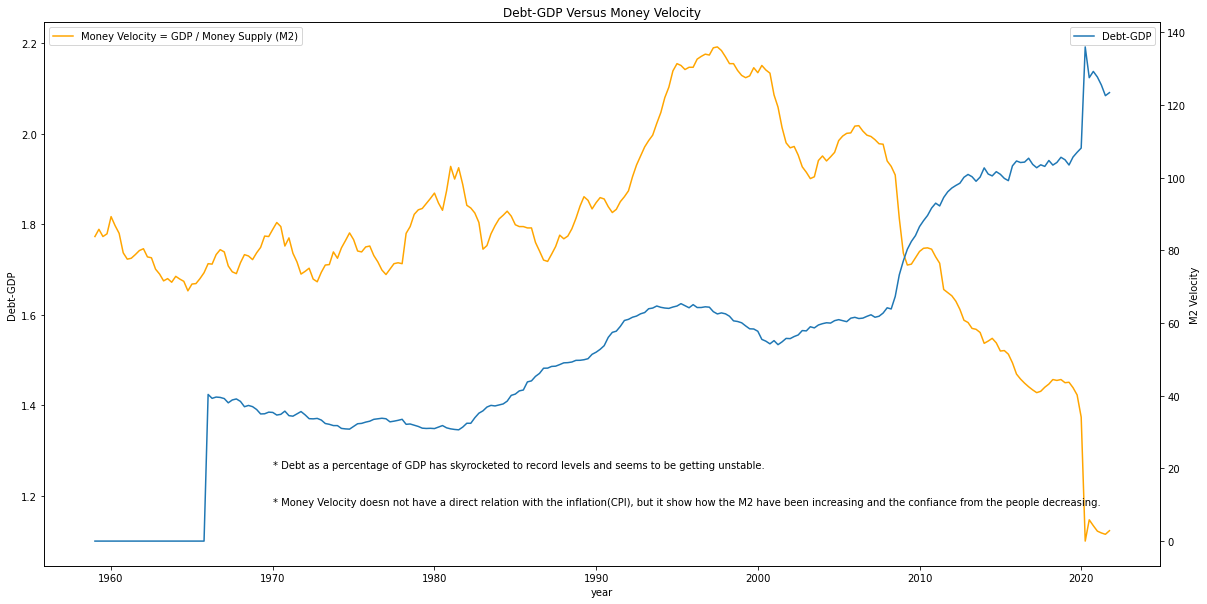

In [92]:
fig,ax=plt.subplots(figsize=(20, 10))
ax2=ax.twinx()

plt.title("Debt-GDP Versus Money Velocity")

ax.plot(gdp_m2.DATE, gdp_m2.M2V,color="orange",label="Money Velocity = GDP / Money Supply (M2)")

ax.set_xlabel("year")
ax.set_ylabel("Debt-GDP")

ax2.plot(gdp_m2.DATE, gdp_m2.DEBTGDP,label="Debt-GDP")
ax2.set_ylabel("M2 Velocity")

ax.legend(loc="upper left")
ax2.legend(loc=0)

ax2.text(2, 20, r'* Debt as a percentage of GDP has skyrocketed to record levels and seems to be getting unstable.', fontsize=10)
ax2.text(2, 10, r'* Money Velocity doesn not have a direct relation with the inflation(CPI), but it show how the M2 have been increasing and the confiance from the people decreasing.', fontsize=10)
2
plt.show()